# Predictive Time Series Model:Case Study NSE Kenya 20 Share Index

## 1. Business Understanding

### a) Problem Statement

The Nairobi Securities Exchange (NSE) is the main securities exchange in Kenya, providing a platform for trading a range of financial instruments including equities, bonds, and derivatives. The NSE Share 20 Index is an index of the 20 largest and most actively traded stocks on the NSE, designed to provide a benchmark for the performance of the Kenyan stock market.

The ability to predict stock prices is of great interest to investors, traders, and financial analysts, as it can help them make informed decisions about buying and selling securities. Accurate stock price predictions can also be useful for companies seeking to raise capital through stock offerings, as they can better understand the potential value of their shares.

The Breakfast Club Consultancy is committed to leveraging machine learning techniques to predict the stock prices of the NSE Share 20 Index. By analyzing historical data on stock prices, as well as other economic and financial indicators, models will be trained that can forecast future prices with a high degree of accuracy. The goal is to provide investors, traders, and financial analysts with a valuable tool for making more informed decisions about buying and selling securities on the NSE.

### b) Main Objective

To develop and deploy a predictive time series model that leverages machine learning techniques to accurately forecast the stock prices of the Kenya NSE 20 Share Index, taking into account market-specific factors and historical data.


### c) Specific Objectives

### d) Experimental Design
1. Data Collection
2. Read and check the data
3. Cleaning the data
4. Exploratory Data Analysis
5. Data modelling and model performance evaluation
6. Use the model to make predictions
7. Conclusions and Recommendations
8. Deploy the model

### d) Data Understanding 
The data used in this project was downloaded from [here](https://www.investing.com/indices/kenya-nse-20-historical-data) and [CBK website.](https://www.centralbank.go.ke/inflation-rates/)

The NSE 20 dataset contains 4531 rows and 6 columns with the following information:

|No.| Column    | Description|
|---| ---       | ---         |
|1|Date|Relevant date|
|2|Price|Average price of the stock|
|3|Open|Price at which the stock trades when an exchange opens for the day|
|4|High|Highest price the stock traded on that date|
|5|Low|Lowest price the stock traded on that date|
|6|Change %|Percentage change in stock price from the previous day| 

The data on exchange rate with the USD is downloaded from the [investing website.](https://www.investing.com/currencies/usd-kes-historical-data) It has 4729 rows and 6 columns with the columns having the same information as the NSE 20 dataset columns.

The datasets from the CBK website are on the specific macroeconomic factors affecting the prices of shares. The following datasets have been downloaded:

1. Inflation rates : This has 219 rows and contains the the percentage change in the monthly consumer price index (CPI).
2. Annual GDP : This has 23 rows and contains the Kenyan GDP from 2000-2021
3. Central Bank Rate : Data on this is found in two datasets, with one ranging from 2008-2023 and the other from  1991-2016. They contain the interest rate that the Central Bank of Kenya charges on loans to banks.

## 2. Importing Libraries

In [114]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

## 3. Reading the Data

In [2]:
# loading data on share index
nse_20 = pd.read_csv("Datasets/Kenya NSE 20 Historical Data.csv")
nse_20.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,03/28/2023,"1,581.11","1,581.11","1,581.11","1,581.11",NaN,0.78%
1,03/27/2023,"1,568.94","1,568.94","1,568.94","1,568.94",NaN,0.31%
2,03/24/2023,"1,564.16","1,564.16","1,564.16","1,564.16",NaN,0.34%
3,03/23/2023,"1,558.87","1,558.87","1,558.87","1,558.87",NaN,1.14%
4,03/22/2023,"1,541.26","1,541.26","1,541.26","1,541.26",NaN,0.96%


In [3]:
# loading data on annual GDP
annual_gdp = pd.read_csv("Datasets/Annual GDP.csv")
annual_gdp.head()

,Year,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million)
0,2021,"12,098,200",7.5,"9,391,684"
1,2020,"10,716,034",-0.3,"8,735,040"
2,2019,"10,237,727",5.1,"8,756,946"
3,2018,"9,340,307",5.6,"8,330,891"
4,2017,"8,483,396",3.8,"7,885,521"


In [4]:
# loading data on inflation rate
inflation = pd.read_csv("Datasets/Inflation Rates.csv")
inflation.head()

,Year,Month,Annual Average Inflation,12-Month Inflation
0,2023,February,8.30,9.23
1,2023,January,7.95,8.98
2,2022,December,7.66,9.06
3,2022,November,7.38,9.48
4,2022,October,7.48,9.59


In [5]:
# loading data on CBK interest rate from 2008-2023
cbk_rate_to2023 = pd.read_csv("Datasets/Central Bank Rate (2008-2023) .csv")
cbk_rate_to2023.tail()

,Date,Rate
98,01/12/2008,8.5
99,29/10/2008,9.0
100,01/10/2008,9.0
101,29/09/2008,9.0
102,06/08/2008,9.0


In [6]:
# loading data on CBK interest rate from 1991-2016
cbk_rate_to2016 = pd.read_csv("Datasets/Central Bank Rates (1991-2016).csv")
cbk_rate_to2016.head()

,Year,Month,Repo,Reverse Repo,Interbank Rate,91-Day T-bill,182-Day T-bill,364-Day T-bill,Cash Reserve Requirement,Central Bank Rate
0,2016,July,9.76,10.57,5.88,6.16,9.79,10.88,5.25,10.5
1,2016,June,10.04,10.59,4.56,7.25,9.56,10.84,5.25,10.5
2,2016,May,6,11.55,3.82,8.15,10.25,11.60,5.25,10.5
3,2016,April,5.23,12.49,4.01,8.92,10.87,11.84,5.25,11.5
4,2016,March,4.31,11.63,4.10,8.72,10.83,12.26,5.25,11.5


In [7]:
# loading data on exchange rate
exchange_rate = pd.read_csv("Datasets/USD_KES Historical Data.csv")
exchange_rate.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,03/31/2023,132.45,132.350,132.55,132.15,0.02K,0.26%
1,03/30/2023,132.10,132.050,132.55,131.90,0.10K,0.08%
2,03/29/2023,132.00,131.725,132.20,131.60,0.11K,0.23%
3,03/28/2023,131.70,131.600,131.90,131.40,0.10K,0.19%
4,03/27/2023,131.45,131.450,131.60,131.30,0.06K,0.11%


## 4. Data Wrangling
### 4.3 Dropping columns

Out of the several datasets that were collected, only some features and rows are relevant to the process. Therefore, in this step, the features that are not required from each dataset will be dropped. The remaining datasets will then be joined.

In [8]:
# Selecting necessary columns in the annual_gdp dataset
nse_20_new = nse_20[["Date", "Price"]]
nse_20_new.head()

,Date,Price
0,03/28/2023,"1,581.11"
1,03/27/2023,"1,568.94"
2,03/24/2023,"1,564.16"
3,03/23/2023,"1,558.87"
4,03/22/2023,"1,541.26"


In [9]:
nse_20_new.shape

(4530, 2)

This dataset contains 4530 rows and 2 columns.

In [10]:
# Selecting relevant columns in the annual_gdp dataset
annual_gdp_new = annual_gdp[["Year", "Real GDP prices (Ksh Million)"]]
annual_gdp_new.head()

,Year,Real GDP prices (Ksh Million)
0,2021,"9,391,684"
1,2020,"8,735,040"
2,2019,"8,756,946"
3,2018,"8,330,891"
4,2017,"7,885,521"


In [11]:
annual_gdp_new.shape

(23, 2)

This dataset has 23 rows and 2 columns

In [12]:
# Dropping unnecessary columns in the inflation dataset
inflation_new = inflation.drop(['Annual Average Inflation'], axis=1)
inflation_new.head()

,Year,Month,12-Month Inflation
0,2023,February,9.23
1,2023,January,8.98
2,2022,December,9.06
3,2022,November,9.48
4,2022,October,9.59


In [13]:
inflation_new.shape

(219, 3)

This dataset contains 219 rows and 3 columns.

In [14]:
# For the cbk_to_2016 dataset, the only column required is the central bank rate
cbk_rate_to2016_new = cbk_rate_to2016[['Year', 'Month', 'Central Bank Rate']] 
cbk_rate_to2016_new.tail()

,Year,Month,Central Bank Rate
296,1991,November,NaN
297,1991,October,NaN
298,1991,September,0.0
299,1991,August,0.0
300,1991,July,0.0


In [15]:
cbk_rate_to2016_new.shape

(301, 3)

This dataset contains 301 rows and 3 columns.

In [16]:
# In the exchage_rate dataset, we only keep the US dollar column
exchange_rate_new = exchange_rate[["Date","Price"]]
exchange_rate_new.tail()

,Date,Price
4724,01/07/2005,78.500
4725,01/06/2005,78.675
4726,01/05/2005,78.600
4727,01/04/2005,78.650
4728,01/03/2005,78.500


In [17]:
exchange_rate_new.shape

(4729, 2)

This dataset contains 362 rows and 3 columns.

Now that we have all the information we need from each dataset, we can format the datatypes.

### 4.2 Formatting Datatypes

The cbk_rates datasets are in different formats, so before joining them, that needs to be adjusted. Since the data required should only be from 2005, any data before that will be dropped.

#### 4.2.1 CBK rates dataframes

In [18]:
# changing year column to string
cbk_rate_to2016_new.Year = cbk_rate_to2016_new.Year.astype("str")

# creating Date column which is an aggregation of month and year columns
cbk_rate_to2016_new["Date"] = cbk_rate_to2016_new[["Month","Year"]].agg(' '.join, axis=1)

# converting to datetime format
cbk_rate_to2016_new["Date"] = pd.to_datetime(cbk_rate_to2016_new.Date)

In [19]:
# previewing
cbk_rate_to2016_new.head()

,Year,Month,Central Bank Rate,Date
0,2016,July,10.5,2016-07-01
1,2016,June,10.5,2016-06-01
2,2016,May,10.5,2016-05-01
3,2016,April,11.5,2016-04-01
4,2016,March,11.5,2016-03-01


In [20]:
# Dropping data from the cbk_rate_to2016_new that dates before 2005
start_date = '2005-01-01'
end_date = '2008-07-31'
cbk_rate_to2016_final = cbk_rate_to2016_new[
    (cbk_rate_to2016_new['Date'] >= start_date) & (cbk_rate_to2016_new['Date'] <= end_date)]
cbk_rate_to2016_final.head()

,Year,Month,Central Bank Rate,Date
96,2008,July,9.00,2008-07-01
97,2008,June,9.00,2008-06-01
98,2008,May,8.75,2008-05-01
99,2008,April,8.75,2008-04-01
100,2008,March,8.75,2008-03-01


In [21]:
# dropping Year and Month columns
cbk_rate_to2016_final = cbk_rate_to2016_final[['Central Bank Rate', 'Date']]
cbk_rate_to2016_final.head()

,Central Bank Rate,Date
96,9.00,2008-07-01
97,9.00,2008-06-01
98,8.75,2008-05-01
99,8.75,2008-04-01
100,8.75,2008-03-01


In [22]:
# Changing the cbk_rate_to2023 from string to datetime format
cbk_rate_to2023.Date = pd.to_datetime(cbk_rate_to2023.Date,format="%d/%m/%Y")
cbk_rate_to2023.head()

,Date,Rate
0,2023-03-29,9.50
1,2023-01-30,8.75
2,2022-11-23,8.75
3,2022-09-29,8.25
4,2022-07-27,7.50


In [23]:
# Joining the cbk_rate_to2016_final and the cbk_rate_2023 datasets
# Ensuring that the column names match
cbk_rate_to2016_final.rename(columns={'Central Bank Rate':'Rate'}, inplace=True)
cbk_rate_to2016_final.head()

,Rate,Date
96,9.00,2008-07-01
97,9.00,2008-06-01
98,8.75,2008-05-01
99,8.75,2008-04-01
100,8.75,2008-03-01


In [24]:
# concatenating the two dataframes
merged_cbk_rate_df = pd.concat([cbk_rate_to2023, cbk_rate_to2016_final])
merged_cbk_rate_df.head()

,Date,Rate
0,2023-03-29,9.50
1,2023-01-30,8.75
2,2022-11-23,8.75
3,2022-09-29,8.25
4,2022-07-27,7.50


In [25]:
# renaming the rates column
merged_cbk_rate_df = merged_cbk_rate_df.rename(columns = {'Rate':'CBK Rates'})
merged_cbk_rate_df.head()

,Date,CBK Rates
0,2023-03-29,9.50
1,2023-01-30,8.75
2,2022-11-23,8.75
3,2022-09-29,8.25
4,2022-07-27,7.50


#### 4.2.2 Inflation dataframe

In [26]:
# Converting the inflation dataframe to datetime format
# changing year column to string
inflation_new.Year = inflation_new.Year.astype("str")

# creating Date column which is an aggregation of month and year columns
inflation_new["Date"] = inflation_new[["Month","Year"]].agg(' '.join, axis=1)

# converting to datetime format
inflation_new["Date"] = pd.to_datetime(inflation_new.Date)

In [27]:
# previewing
inflation_new.head()

,Year,Month,12-Month Inflation,Date
0,2023,February,9.23,2023-02-01
1,2023,January,8.98,2023-01-01
2,2022,December,9.06,2022-12-01
3,2022,November,9.48,2022-11-01
4,2022,October,9.59,2022-10-01


In [28]:
# dropping Year and Month columns
inflation_final = inflation_new[['12-Month Inflation', 'Date']]
inflation_final.head()

,12-Month Inflation,Date
0,9.23,2023-02-01
1,8.98,2023-01-01
2,9.06,2022-12-01
3,9.48,2022-11-01
4,9.59,2022-10-01


In [29]:
# renaming the inflation column
inflation_final = inflation_final.rename(columns={'12-Month Inflation':'Inflation Rate'})
inflation_final.tail()

,Inflation Rate,Date
214,14.78,2005-05-01
215,16.02,2005-04-01
216,14.15,2005-03-01
217,13.94,2005-02-01
218,14.87,2005-01-01


In [30]:
inflation_final.shape

(219, 2)

#### 4.2.3 NSE 20 dataframe

In [31]:
# formatting the date column
nse_20_new.Date = pd.to_datetime(nse_20_new.Date,format="%m/%d/%Y")
nse_20_new.head()

,Date,Price
0,2023-03-28,"1,581.11"
1,2023-03-27,"1,568.94"
2,2023-03-24,"1,564.16"
3,2023-03-23,"1,558.87"
4,2023-03-22,"1,541.26"


In [32]:
# Converting Price column to float
nse_20_new.Price = nse_20_new.Price.str.replace(",","")
nse_20_new.Price = nse_20_new.Price.astype("float")
nse_20_new.head()

,Date,Price
0,2023-03-28,1581.11
1,2023-03-27,1568.94
2,2023-03-24,1564.16
3,2023-03-23,1558.87
4,2023-03-22,1541.26


In [33]:
# previewing
nse_20_new.tail()

,Date,Price
4525,2005-01-07,3007.94
4526,2005-01-06,2981.10
4527,2005-01-05,2991.32
4528,2005-01-04,2980.48
4529,2005-01-03,2955.99


#### 4.2.4 Exchange Rate

In [34]:
# previewing
exchange_rate_new.head()

,Date,Price
0,03/31/2023,132.45
1,03/30/2023,132.10
2,03/29/2023,132.00
3,03/28/2023,131.70
4,03/27/2023,131.45


In [35]:
# changing the date column to datetime format
exchange_rate_new['Date'] = pd.to_datetime(exchange_rate_new["Date"],format="%m/%d/%Y")
exchange_rate_new.head()

,Date,Price
0,2023-03-31,132.45
1,2023-03-30,132.10
2,2023-03-29,132.00
3,2023-03-28,131.70
4,2023-03-27,131.45


In [36]:
# renaming exchange rate column
exchange_rate_new.rename(columns={"Price":"Exc Rate"},inplace=True)

#### 4.2.5 Annual GDP Dataframe

In [37]:
#  Converting Real GDP column to integer
annual_gdp_new['Real GDP prices (Ksh Million)'] = annual_gdp_new['Real GDP prices (Ksh Million)'].str.replace(",","")
annual_gdp_new['Real GDP prices (Ksh Million)'] = annual_gdp_new['Real GDP prices (Ksh Million)'].astype("int")
annual_gdp_new.head()

,Year,Real GDP prices (Ksh Million)
0,2021,9391684
1,2020,8735040
2,2019,8756946
3,2018,8330891
4,2017,7885521


In [38]:
# dropping the last row which has 0 on all columns
annual_gdp_final = annual_gdp_new.drop(index=22)

In [39]:
# converting to datetime format
annual_gdp_final.Year = pd.to_datetime(annual_gdp_final.Year,format="%Y")
annual_gdp_final.head()

,Year,Real GDP prices (Ksh Million)
0,2021-01-01,9391684
1,2020-01-01,8735040
2,2019-01-01,8756946
3,2018-01-01,8330891
4,2017-01-01,7885521


In [40]:
annual_gdp_final.shape

(22, 2)

In [41]:
# changing Year column to Date for uniformity
annual_gdp_final = annual_gdp_final.rename(columns={'Year':'Date'}) 
annual_gdp_final.head()

,Date,Real GDP prices (Ksh Million)
0,2021-01-01,9391684
1,2020-01-01,8735040
2,2019-01-01,8756946
3,2018-01-01,8330891
4,2017-01-01,7885521


In [42]:
# Slice the dataset from before 2005
annual_gdp_final = annual_gdp_final[annual_gdp_final['Date'].dt.year >= 2005]
annual_gdp_final.head()

,Date,Real GDP prices (Ksh Million)
0,2021-01-01,9391684
1,2020-01-01,8735040
2,2019-01-01,8756946
3,2018-01-01,8330891
4,2017-01-01,7885521


In [43]:
# renaming GDP column
annual_gdp_final = annual_gdp_final.rename(columns = {'Real GDP prices (Ksh Million)':'GDP'})
annual_gdp_final.head()

,Date,GDP
0,2021-01-01,9391684
1,2020-01-01,8735040
2,2019-01-01,8756946
3,2018-01-01,8330891
4,2017-01-01,7885521


### 4.3 Joining all the datasets

In [44]:
# performing outer join on Date
Data_1 = pd.merge(nse_20_new, merged_cbk_rate_df, on='Date', how='outer')

Data_2 = pd.merge(Data_1, exchange_rate_new, on='Date', how='outer')

Data_3 = pd.merge(Data_2, inflation_final, on='Date', how='outer')

Data_4 = pd.merge(Data_3, annual_gdp_final, on='Date', how='outer')

In [45]:
# sorting the dataframe by Date
final_dataset = Data_4.sort_values(by="Date",ascending=False)

In [46]:
# setting date column as index
final_dataset = final_dataset.set_index("Date")

In [47]:
# previewing
final_dataset.head()

,Price,CBK Rates,Exc Rate,Inflation Rate,GDP
Date,,,,,
2023-03-31,NaN,NaN,132.45,NaN,NaN
2023-03-30,NaN,NaN,132.10,NaN,NaN
2023-03-29,NaN,9.5,132.00,NaN,NaN
2023-03-28,1581.11,NaN,131.70,NaN,NaN
2023-03-27,1568.94,NaN,131.45,NaN,NaN


In [48]:
# checking for missing values
final_dataset.isnull().sum()

Price              266
CBK Rates         4670
Exc Rate            67
Inflation Rate    4580
GDP               4782
dtype: int64

In [49]:
# forward filling certain columns
filled_dataset = final_dataset[["Price","CBK Rates","Exc Rate","Inflation Rate"]].fillna(method="ffill")

In [50]:
# back filling GDP column
filled_dataset1 = final_dataset["GDP"].fillna(method="bfill")

In [51]:
# joining the two datasets
filled_dataset = filled_dataset.merge(filled_dataset1,on="Date",how="outer")

In [52]:
filled_dataset.head()

,Price,CBK Rates,Exc Rate,Inflation Rate,GDP
Date,,,,,
2023-03-31,NaN,NaN,132.45,NaN,9391684.0
2023-03-30,NaN,NaN,132.10,NaN,9391684.0
2023-03-29,NaN,9.5,132.00,NaN,9391684.0
2023-03-28,1581.11,9.5,131.70,NaN,9391684.0
2023-03-27,1568.94,9.5,131.45,NaN,9391684.0


In [53]:
# backfilling remaining missing values
filled_dataset = filled_dataset.bfill()

In [54]:
filled_dataset.head()

,Price,CBK Rates,Exc Rate,Inflation Rate,GDP
Date,,,,,
2023-03-31,1581.11,9.5,132.45,9.23,9391684.0
2023-03-30,1581.11,9.5,132.10,9.23,9391684.0
2023-03-29,1581.11,9.5,132.00,9.23,9391684.0
2023-03-28,1581.11,9.5,131.70,9.23,9391684.0
2023-03-27,1568.94,9.5,131.45,9.23,9391684.0


In [55]:
# Create a new DataFrame with a full date range
start_date = filled_dataset.index.min()
end_date = filled_dataset.index.max()
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
full_df = pd.DataFrame(index=date_range)
full_df.head()

""
2005-01-01
2005-01-02
2005-01-03
2005-01-04
2005-01-05


In [56]:
# sorting dates in descending order
full_df.sort_index(ascending=False,inplace=True)

In [57]:
# resetting index in order to merge
filled_dataset.reset_index(inplace=True)

In [58]:
# naming the dates dataframe
full_df.index.name = "Date"

In [59]:
# merging the two datasets on date
main_df = full_df.merge(filled_dataset,how="outer",on="Date")

In [60]:
# backfilling missing values
main_df = main_df.bfill()

In [61]:
# checking for missing values
main_df.isna().sum()

Date              0
Price             0
CBK Rates         0
Exc Rate          0
Inflation Rate    0
GDP               0
dtype: int64

In [62]:
# checking for duplicates
main_df.duplicated().sum()

9

In [63]:
# dropping duplicates
main_df.drop_duplicates(inplace=True)

In [64]:
# setting date as index columns
main_df.set_index("Date",inplace=True)

## 5. Exploratory Data Analysis
### 5.1 Univariate Analysis

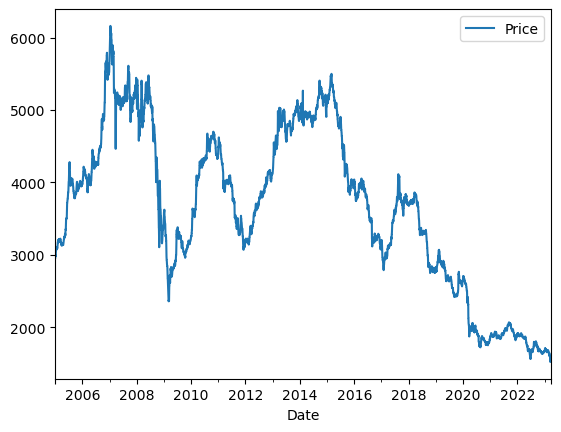

In [65]:
main_df.plot(y="Price");

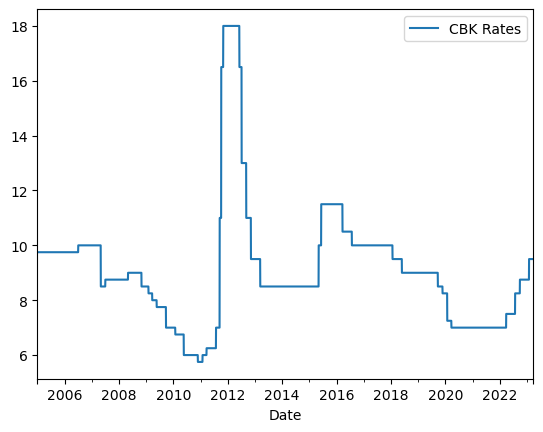

In [66]:
main_df.plot(y="CBK Rates");

In 2016, CBK introduced a cap on their interest rates and this can be seen on the graph because there is a downward trend

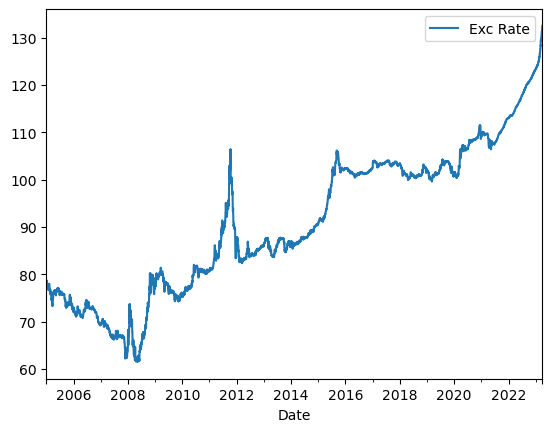

In [67]:
main_df.plot(y="Exc Rate");

The exchange rate has been going up since 2008.

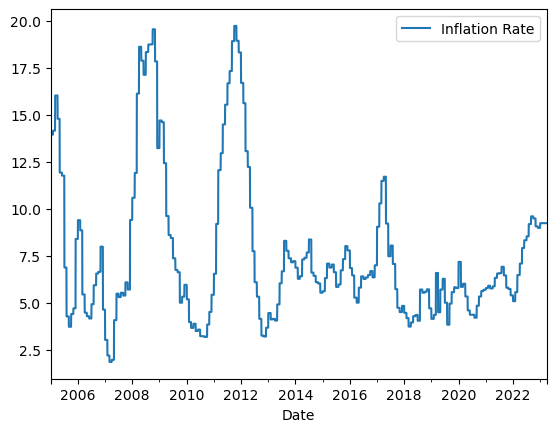

In [68]:
main_df.plot(y="Inflation Rate");

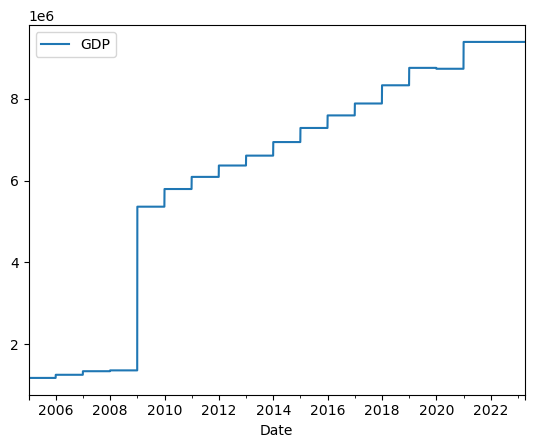

In [69]:
main_df.plot(y="GDP");

The GDP has been going up.

In [70]:
main_df.corr()["Price"]

Price             1.000000
CBK Rates         0.130373
Exc Rate         -0.726353
Inflation Rate   -0.012831
GDP              -0.604425
Name: Price, dtype: float64

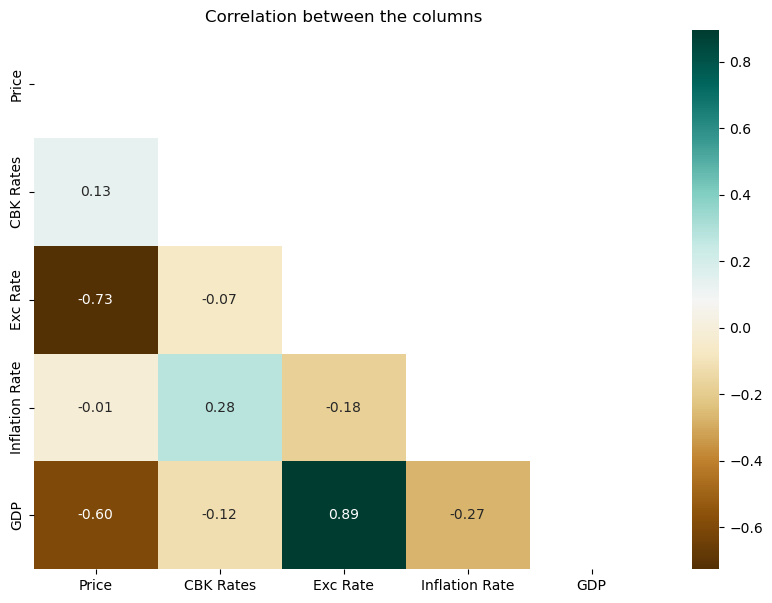

In [71]:
#correlation heatmap
plt.figure(figsize=(10,7))
mask = np.triu(np.ones_like(main_df.corr(), dtype=bool))
sns.heatmap(main_df.corr(),annot=True,cmap="BrBG",fmt=".2f", mask=mask);
plt.title('Correlation between the columns')
plt.show()

In [72]:
def run_seasonal_decompositions(data, cols, models=['additive'], freqs=[1]):
    
    # Initialize result dictionary
    result_dict = {}
    
    # Perform seasonal decomposition on specified columns with different models and frequencies
    for col in cols:
        result_dict[col] = {}
        for model in models:
            result_dict[col][model] = {}
            for freq in freqs:
                result = seasonal_decompose(data[col], model=model,extrapolate_trend='freq')
    return result_dict                

In [73]:
run_seasonal_decompositions(main_df,main_df.columns)

{'Price': {'additive': {}},
 'CBK Rates': {'additive': {}},
 'Exc Rate': {'additive': {}},
 'Inflation Rate': {'additive': {}},
 'GDP': {'additive': {}}}

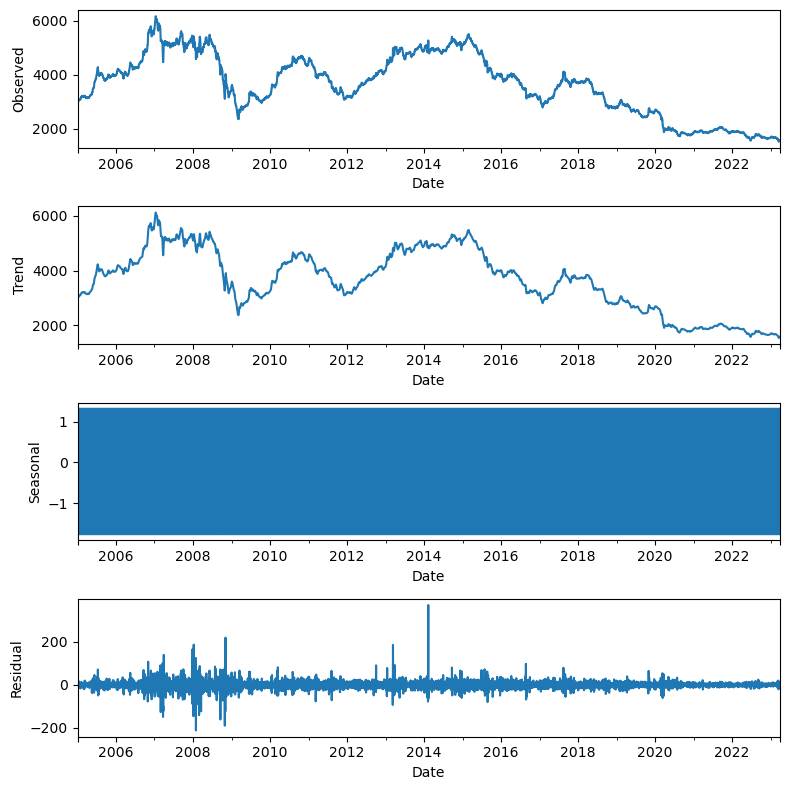

In [74]:
# Decompose time series into trend, seasonality, and residuals
result = seasonal_decompose(main_df['Price'], model='additive')

# Plot decomposition results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 8))
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

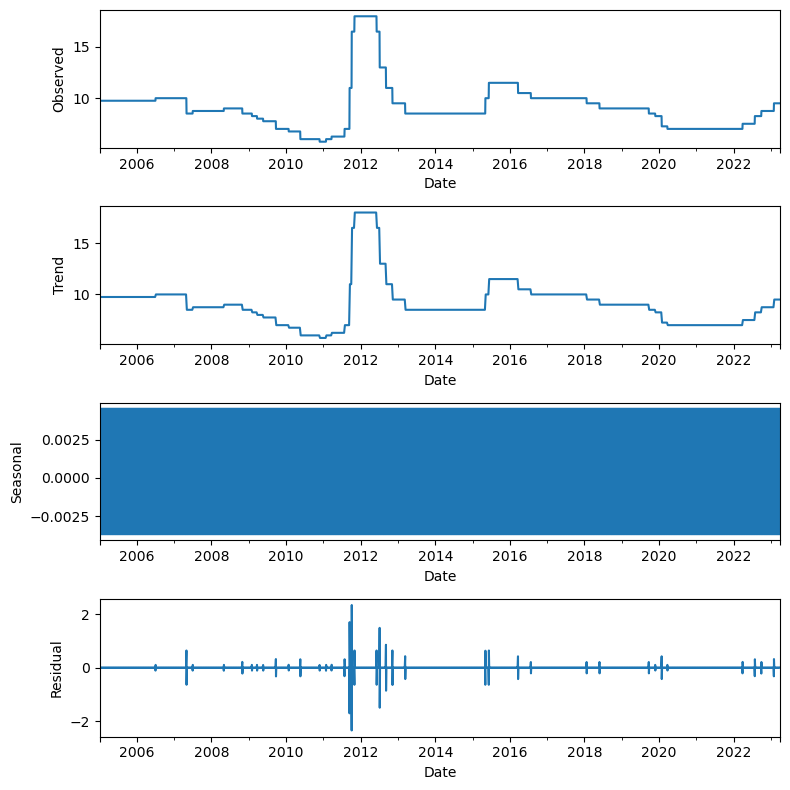

In [75]:
# Decompose time series into trend, seasonality, and residuals
result = seasonal_decompose(main_df['CBK Rates'], model='additive')

# Plot decomposition results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 8))
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

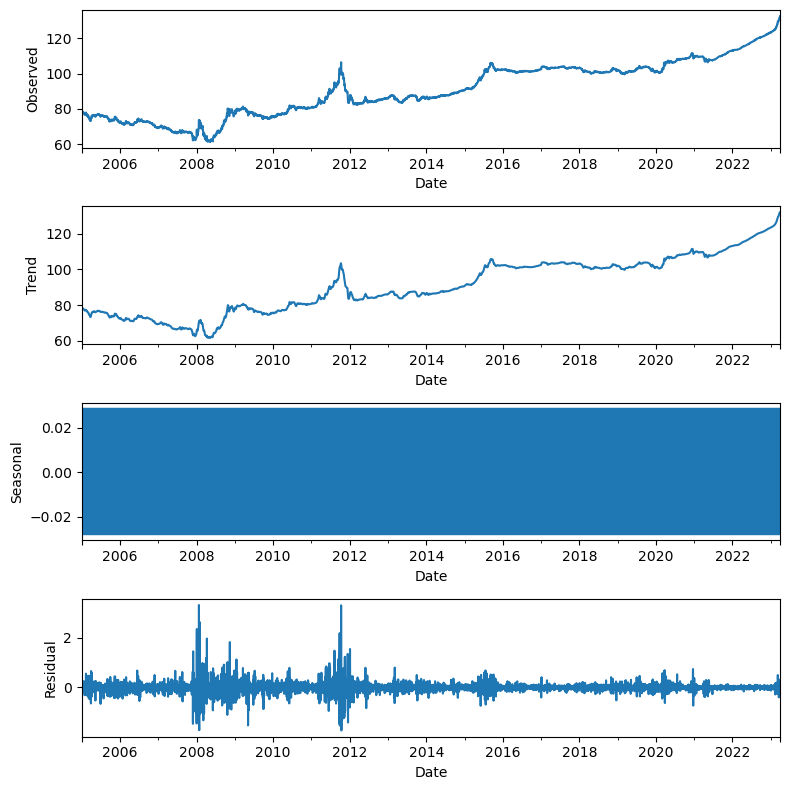

In [76]:
# Decompose time series into trend, seasonality, and residuals
result = seasonal_decompose(main_df['Exc Rate'], model='additive')

# Plot decomposition results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 8))
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

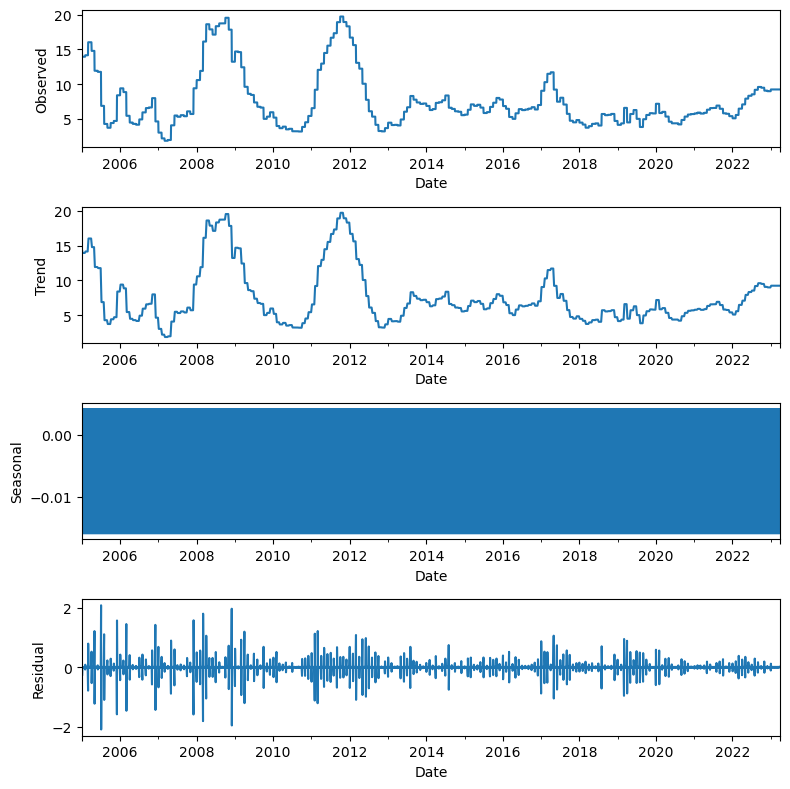

In [77]:
# Decompose time series into trend, seasonality, and residuals
result = seasonal_decompose(main_df['Inflation Rate'], model='additive')

# Plot decomposition results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 8))
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

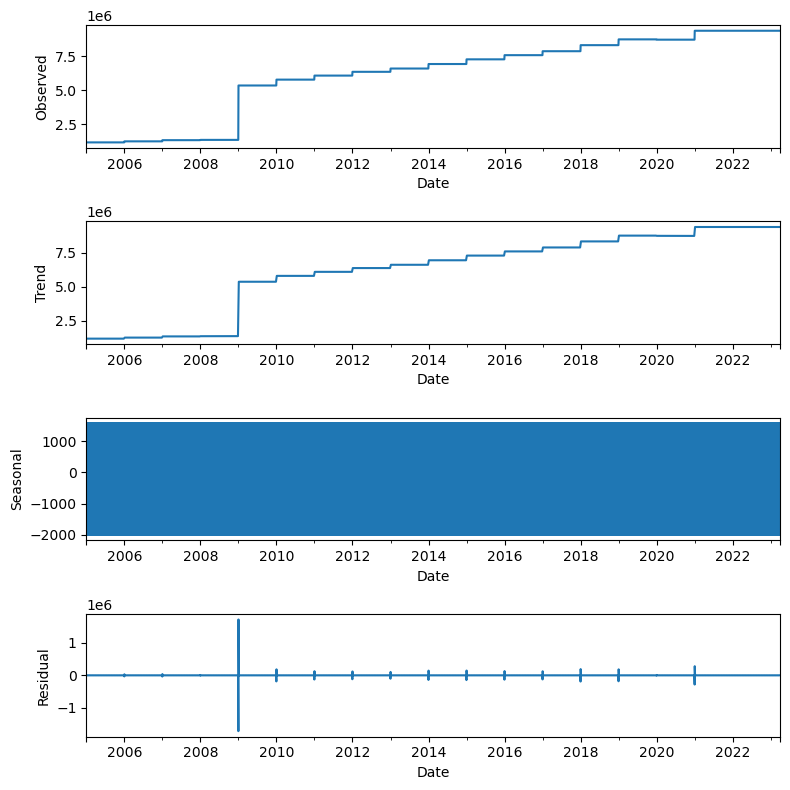

In [78]:
# Decompose time series into trend, seasonality, and residuals
result = seasonal_decompose(main_df['GDP'], model='additive')

# Plot decomposition results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 8))
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

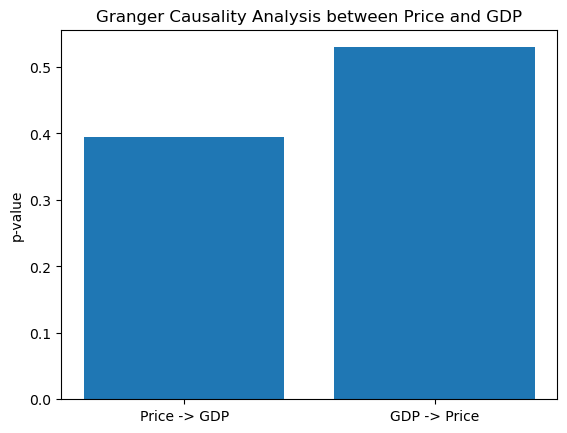

In [79]:
# Perform Granger Causality Analysis
gc_gdp = sm.tsa.stattools.grangercausalitytests(main_df[["Price","GDP"]], maxlag=1, verbose=False)

# Extract p-values from results and plot
p_vals = [gc_gdp[1][0]['ssr_ftest'][i] for i in range(2)]
plt.bar(['Price -> GDP', 'GDP -> Price'], p_vals)
plt.title('Granger Causality Analysis between Price and GDP')
plt.ylabel('p-value')
plt.show()

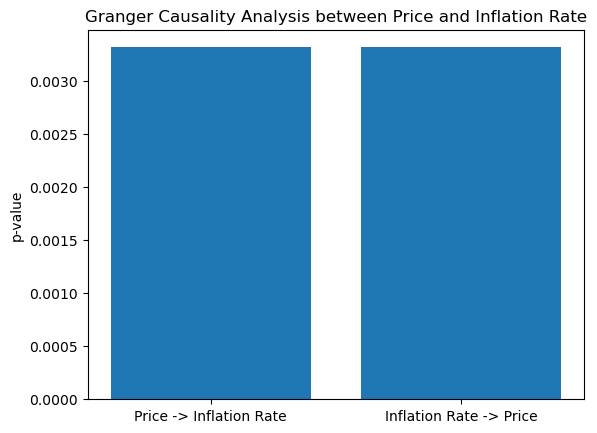

In [80]:
# Perform Granger Causality Analysis
gc_inf = sm.tsa.stattools.grangercausalitytests(main_df[["Price","Inflation Rate"]], maxlag=1, verbose=False)

# Extract p-values from results and plot
p_vals = gc_inf[1][0]['ssr_ftest'][1]
plt.bar(['Price -> Inflation Rate', 'Inflation Rate -> Price'], p_vals)
plt.title('Granger Causality Analysis between Price and Inflation Rate')
plt.ylabel('p-value')
plt.show()

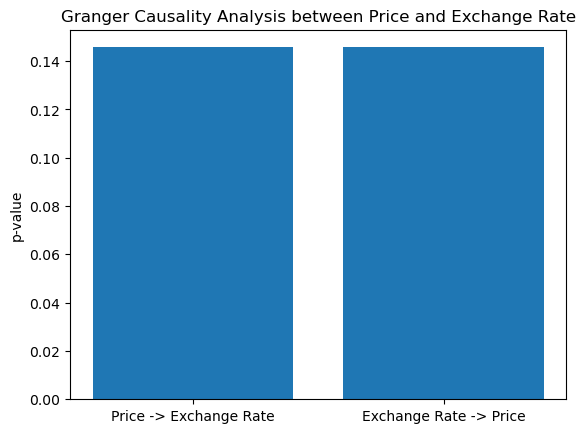

In [81]:
# Perform Granger Causality Analysis
gc_exc = sm.tsa.stattools.grangercausalitytests(main_df[["Price","Exc Rate"]], maxlag=1, verbose=False)

# Extract p-values from results and plot
p_vals = gc_exc[1][0]['ssr_ftest'][1]
plt.bar(['Price -> Exchange Rate', 'Exchange Rate -> Price'], p_vals)
plt.title('Granger Causality Analysis between Price and Exchange Rate')
plt.ylabel('p-value')
plt.show()

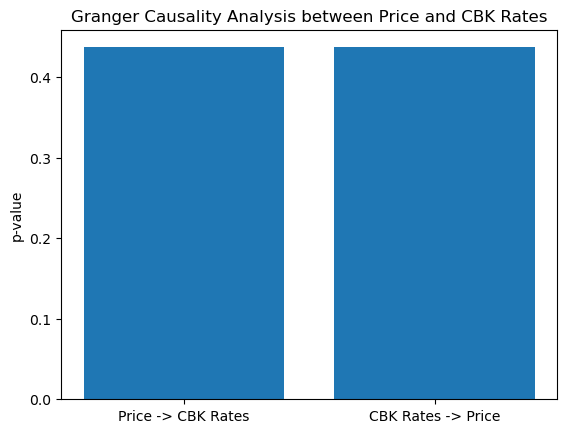

In [82]:
# Perform Granger Causality Analysis
gc_cbk = sm.tsa.stattools.grangercausalitytests(main_df[["Price","CBK Rates"]], maxlag=1, verbose=False)

# Extract p-values from results and plot
p_vals = gc_cbk[1][0]['ssr_ftest'][1]
plt.bar(['Price -> CBK Rates', 'CBK Rates -> Price'], p_vals)
plt.title('Granger Causality Analysis between Price and CBK Rates')
plt.ylabel('p-value')
plt.show()

## 7. Data Preprocessing
### 7.1 Checking for Stationarity

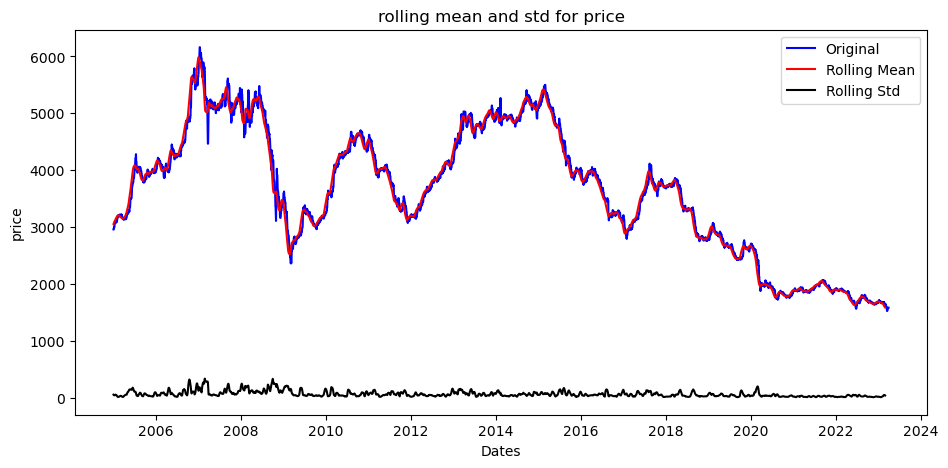

In [83]:
rollingmean = main_df.Price.rolling(window = 30, center = False).mean()
rollingstd = main_df.Price.rolling(window = 30, center = False).std()

fig = plt.figure(figsize=(11,5))
orig = plt.plot(main_df.Price, color='blue',label='Original')
mean = plt.plot(rollingmean, color='red', label='Rolling Mean')
std = plt.plot(rollingstd, color='black', label = 'Rolling Std')
plt.xlabel('Dates')
plt.ylabel('price')
plt.legend(loc='best')
plt.title('rolling mean and std for price')
plt.show()

From the graph, the data does not appear to be stationary since the rolling mean is not constant.

In [84]:
result = adfuller(main_df["Price"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.925891
p-value: 0.319981


The p-value is 0.32 therefore we fail to reject the null hypothesis and determine that the data is not stationary. The data will need to be differenced so that it becomes stationary and fit for modelling

In [85]:
# differenced = main_df["Price"].diff(periods=1).dropna()
# result_diff = adfuller(differenced)
# print('ADF Statistic: %f' % result_diff[0])
# print('p-value: %f' % result_diff[1])

ADF Statistic: -26.471330
p-value: 0.000000


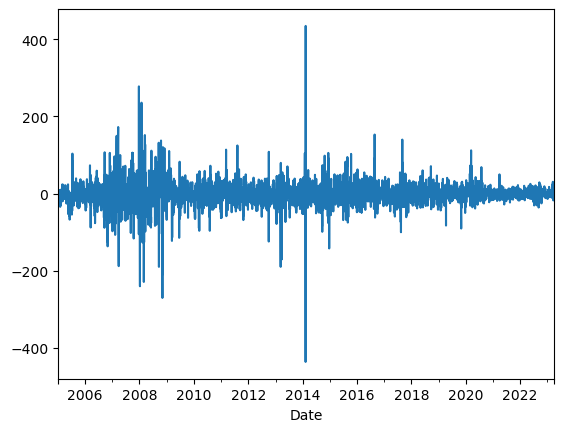

In [86]:
# differenced.plot();

In [87]:
# differenced_df = pd.concat([main_df,differenced],axis=1).sort_index(ascending=False).iloc[:,1:]
# differenced_df.head()

,CBK Rates,Exc Rate,Inflation Rate,GDP,Price
Date,,,,,
2023-03-31,9.5,132.45,9.23,9391684.0,NaN
2023-03-30,9.5,132.10,9.23,9391684.0,0.00
2023-03-29,9.5,132.00,9.23,9391684.0,0.00
2023-03-28,9.5,131.70,9.23,9391684.0,0.00
2023-03-27,9.5,131.45,9.23,9391684.0,-12.17


In [88]:
# differenced_df.tail()

,CBK Rates,Exc Rate,Inflation Rate,GDP,Price
Date,,,,,
2005-01-05,9.75,78.60,13.94,1172784.0,10.22
2005-01-04,9.75,78.65,13.94,1172784.0,-10.84
2005-01-03,9.75,78.50,13.94,1172784.0,-24.49
2005-01-02,9.75,78.50,14.87,1172784.0,0.00
2005-01-01,9.75,78.50,14.87,1172784.0,0.00


In [96]:
time_series = main_df.Price

In [97]:
baseline_series = main_df.Price
baseline_series.head()

Date
2023-03-31    1581.11
2023-03-30    1581.11
2023-03-29    1581.11
2023-03-28    1581.11
2023-03-27    1568.94
Name: Price, dtype: float64

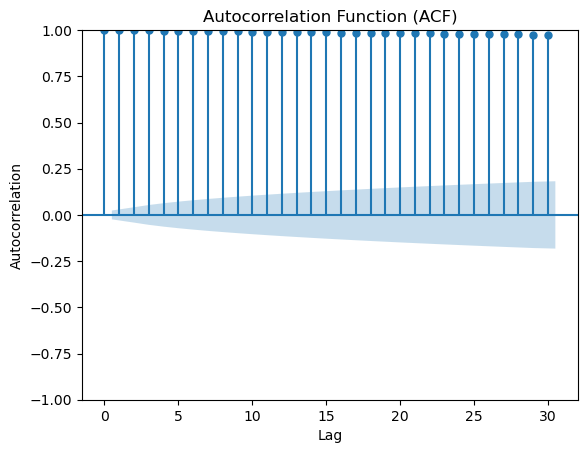

In [103]:
# Plot ACF
plot_acf(baseline_series, lags=30)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function (ACF)")
plt.show()

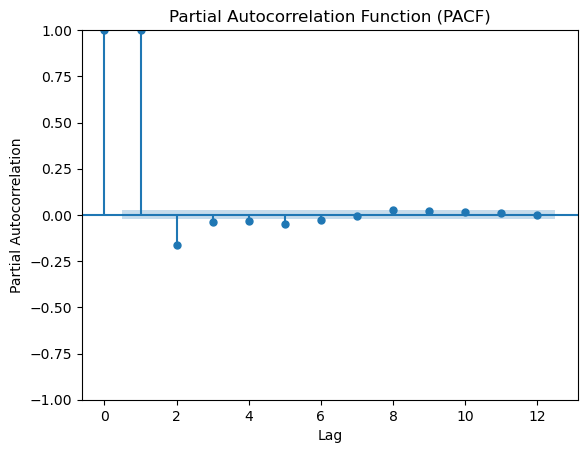

In [105]:
# Plot PACF
plot_pacf(baseline_series, lags=12)
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

In [110]:
# using auto arima to find the best p,d,q for our model
model = auto_arima(baseline_series, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=62030.492, Time=7.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=62465.206, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=62063.497, Time=0.43 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=62105.776, Time=1.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=62463.617, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=62029.314, Time=2.40 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=62071.847, Time=1.82 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=62046.263, Time=1.94 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=62029.233, Time=3.84 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=62064.765, Time=2.59 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=61996.807, Time=8.27 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=61988.797, Time=13.99 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=61986.862, Time=8.58 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=62026.568, Time=4.95 sec
 ARIMA(4,1,2)(0,0,

In [111]:
train = baseline_series[:'2017-12-31']
test = baseline_series['2018-01-01':]

In [112]:
train.head()

Date
2017-12-31    3711.94
2017-12-30    3711.94
2017-12-29    3711.94
2017-12-28    3711.64
2017-12-27    3714.15
Name: Price, dtype: float64

In [113]:
train.shape

(4748,)

In [115]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=45463.430, Time=2.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=45773.853, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=45483.549, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=45514.332, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=45771.986, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=45461.941, Time=1.74 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=45489.893, Time=1.42 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=45472.672, Time=1.60 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=45462.560, Time=2.91 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=45486.119, Time=1.71 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=45464.140, Time=3.65 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=45435.007, Time=5.45 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=45428.929, Time=9.03 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=45427.016, Time=6.17 sec
 ARIMA(3,1,1)(0,0,0

In [116]:
# Building the Baseline Model
ARIMA_model = ARIMA(train, order=(3,1,2))
ARIMA_model = ARIMA_model.fit()

In [118]:
print(ARIMA_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 4748
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -22706.543
Date:                Sat, 01 Apr 2023   AIC                          45425.086
Time:                        10:37:10   BIC                          45463.877
Sample:                             0   HQIC                         45438.717
                               - 4748                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7429      0.021     83.912      0.000       1.702       1.784
ar.L2         -1.2040      0.025    -48.481      0.000      -1.253      -1.155
ar.L3          0.2096      0.008     27.121      0.0

The p-value for the Ljung-Box test is 0.96 which is greater than 0.05. So we fail to reject the null hypothesis. Meaning that our data has no autocorrelation.

The p-value for Jarque-Bera test is 0.00 which is less than 0.05. We therefore reject the null hypothesis and conclude that our data is not normally distributed. 

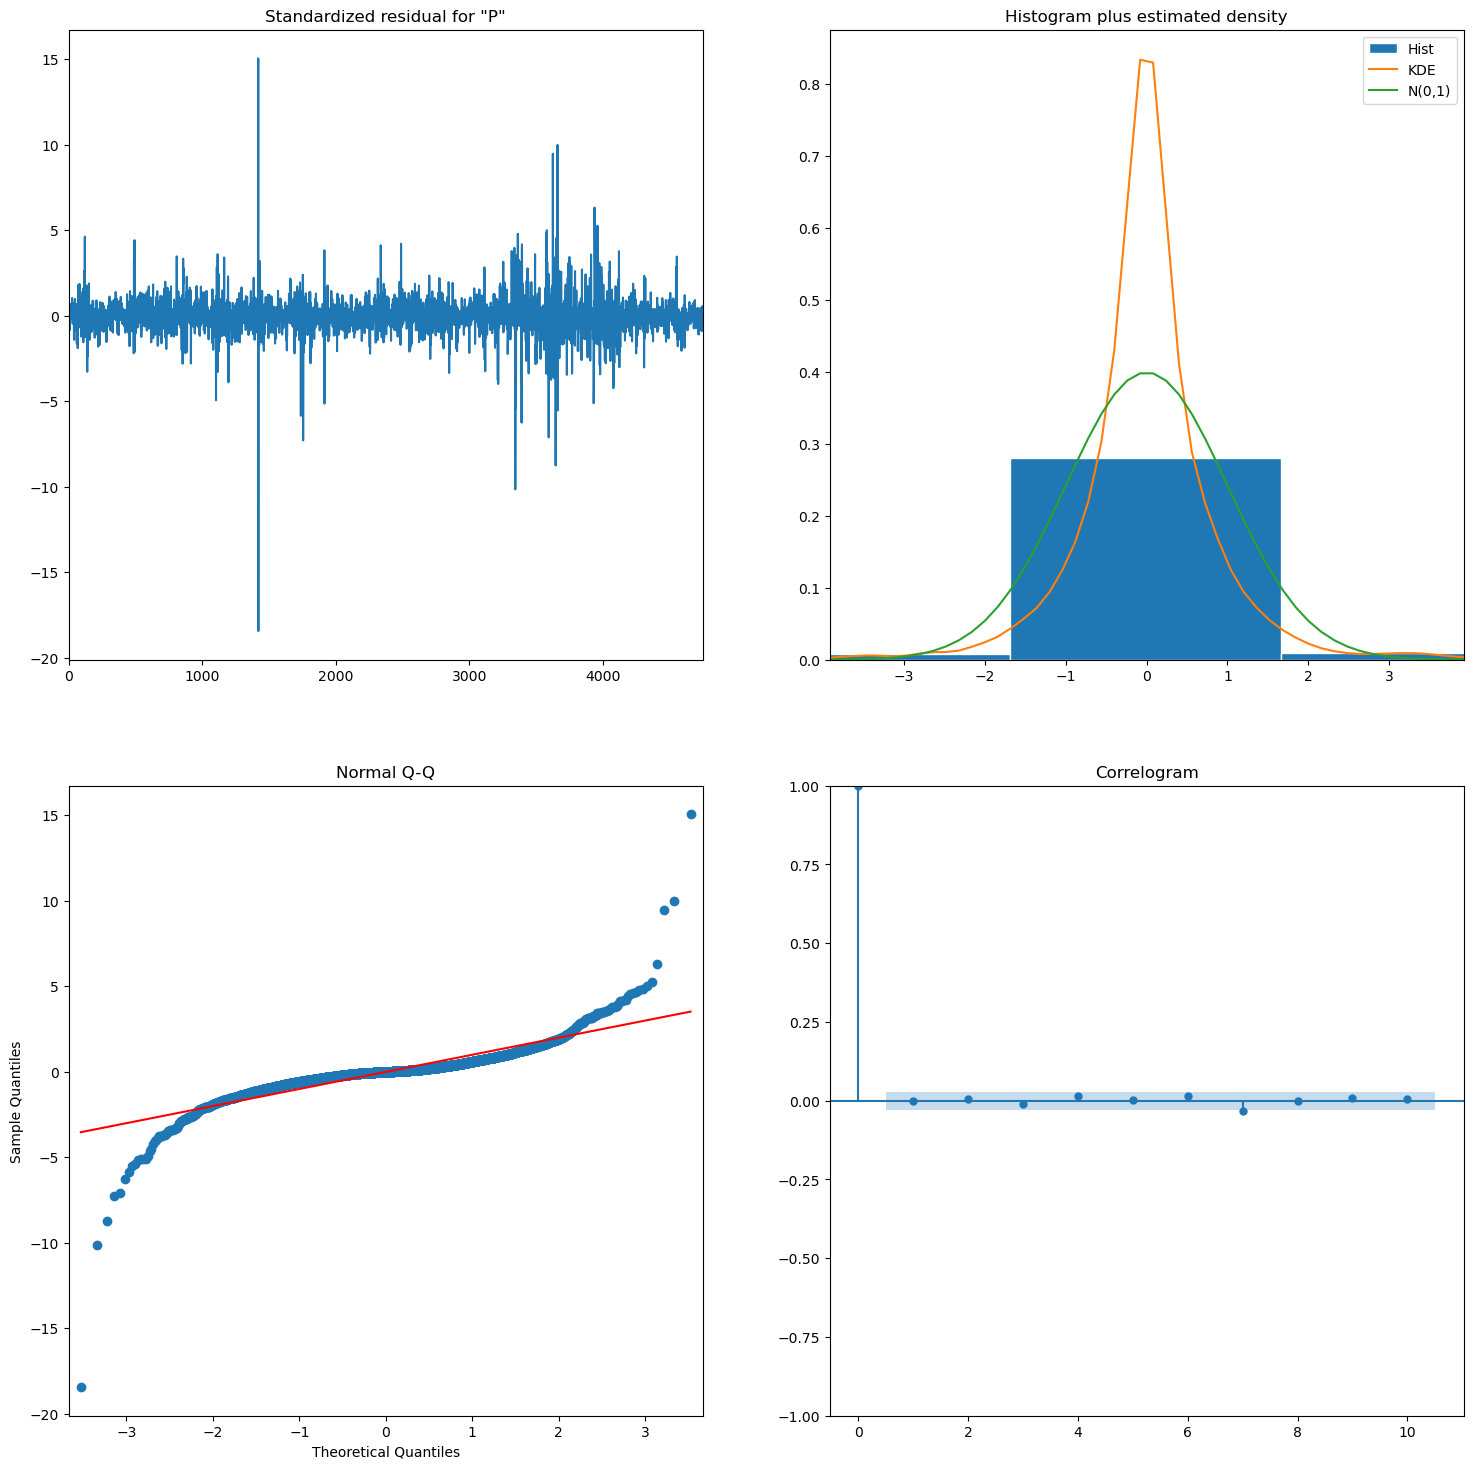

In [120]:
# Model Diagnostics
ARIMA_model.plot_diagnostics(figsize=(18,18))
plt.show()

The first graph shows stationarity in the residual data.

The histogram shows a majority of the values are concentrated around the mean, this means that the plotted residuals follow a normal distribution.

In [123]:
predictions = ARIMA_model.predict(start='2018-01-01', end='2023-03-31', dynamic=True)

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'